In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
border_crossing = pd.read_csv("Datasets/Border_Crossing_Entry_Data.csv")

#Make into a DataFrame
border_crossing = pd.DataFrame(border_crossing)
border_crossing.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
#Analyzing the border on the US-Mexico Border
us_mex = border_crossing[border_crossing["Border"] == "US-Mexico Border"]
us_mex.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
7,Progreso,Texas,2309,US-Mexico Border,03/01/2019 12:00:00 AM,Truck Containers Empty,1808,POINT (-97.94889 26.061670000000003)
19,San Ysidro,California,2504,US-Mexico Border,03/01/2019 12:00:00 AM,Bus Passengers,7779,POINT (-117.02666999999998 32.54306)


In [14]:
#Current means of crossing the border?
#Busiest border crossings?
#Which type of transportation is the most common?
measure = us_mex.groupby("Measure").Value.sum()
measure = pd.DataFrame(measure)

measure

,Value
Measure,
Bus Passengers,68003376
Buses,5450143
Pedestrians,1031249540
Personal Vehicle Passengers,3918732465
Personal Vehicles,1823646820
Rail Containers Empty,8788737
Rail Containers Full,7827258
Train Passengers,287853
Trains,202871


In [13]:
measure_top_6 = measure.head(6)
measure_top_6 = measure_top_6.sort_values(ascending=False)
measure_top_6 = pd.DataFrame(measure_top_6)

measure_top_6

,Value
Measure,
Personal Vehicle Passengers,3918732465
Personal Vehicles,1823646820
Pedestrians,1031249540
Bus Passengers,68003376
Rail Containers Empty,8788737
Buses,5450143


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

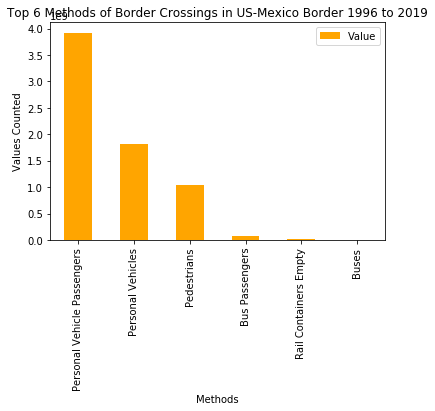

In [21]:
Top_6 = measure_top_6.plot(kind="bar", color="orange", title="Top 6 Methods of Border Crossings in US-Mexico Border 1996 to 2019")

Top_6.set_xlabel("Methods")
Top_6.set_ylabel("Values Counted")

Top_6.xticks(rotation=45)

plt.show()
plt.tight_layout()

#plt.savefig("Visualizations/top_5_reasons.png")